In [2]:
#Import libraries
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
#Import datasheet with pandas
#rdata = rawdata
rdata = pd.read_csv('data1.csv')

#Display data - raw and unfiltered
rdata

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_ms,explicit,id,release_date
0,Me Tengo Que Ir,"[""Adolescent's Orquesta""]",1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846,280189,0,3AK05RIuu30jqJ40cfOxLD,1/10/1996
1,Persona Ideal,"[""Adolescent's Orquesta""]",1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840,283273,0,0u2LbmKA70atp4J59QUnHW,1997
2,Aquel Lugar,"[""Adolescent's Orquesta""]",2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652,233326,0,2vHNqDJe1qvt1sroQfNHSI,2008
3,Virgen,"[""Adolescent's Orquesta""]",2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807,273738,0,4ae223xfO5QUzbDWqLJMag,5/1/2008
4,Arrepentida,"[""Adolescent's Orquesta""]",1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895,251351,0,0f6VT4JZxNc9DE2kUtqlNw,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,['ZZ Top'],1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785,207973,0,2aiEUliMu3v4xxbF48Z6WG,10/28/1985
170649,"Heaven, Hell or Houston",['ZZ Top'],1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518,152427,0,198lkJSVuxsObZYw0dDTK4,7/20/1981
170650,It's so Hard,['ZZ Top'],1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826,311800,0,0KHlEPAx4YUEeO16kwRpBs,7/20/1981
170651,La Grange,['ZZ Top'],2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520,234107,0,060SIy6PC30dMWw6wI6292,7/19/2005


In [4]:
#Drops unneccesary columns to save space 
#data = droppeddata
ddata = rdata.drop(columns=['duration_ms','explicit','id','release_date'])

#Rids of ('' [] "") in artist column
#da is originally a 'Series', use .to_frame() to make into DataFrame
da = ddata.artists.str.strip('["]\'').to_frame()
#da = dataframeartist
da

,artists
0,Adolescent's Orquesta
1,Adolescent's Orquesta
2,Adolescent's Orquesta
3,Adolescent's Orquesta
4,Adolescent's Orquesta
...,...
170648,ZZ Top
170649,ZZ Top
170650,ZZ Top
170651,ZZ Top


In [5]:
#must put cleaned artists column into a new DataFrame
df = ddata.assign(artists=da['artists'])
#df = dataframe - will be using from now on
df

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Me Tengo Que Ir,Adolescent's Orquesta,1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846
1,Persona Ideal,Adolescent's Orquesta,1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840
2,Aquel Lugar,Adolescent's Orquesta,2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652
3,Virgen,Adolescent's Orquesta,2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807
4,Arrepentida,Adolescent's Orquesta,1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,ZZ Top,1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785
170649,"Heaven, Hell or Houston",ZZ Top,1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518
170650,It's so Hard,ZZ Top,1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826
170651,La Grange,ZZ Top,2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520


In [6]:
#Display data type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              170653 non-null  object 
 1   artists           170653 non-null  object 
 2   year              170653 non-null  int64  
 3   acousticness      170653 non-null  float64
 4   danceability      170653 non-null  float64
 5   energy            170653 non-null  float64
 6   instrumentalness  170653 non-null  float64
 7   key               170653 non-null  int64  
 8   liveness          170653 non-null  float64
 9   loudness          170653 non-null  float64
 10  mode              170653 non-null  int64  
 11  popularity        170653 non-null  int64  
 12  speechiness       170653 non-null  float64
 13  tempo             170653 non-null  float64
 14  valence           170653 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 19.5+ MB


In [7]:
#Display some statistics of the data
#There are no null entries (count is same in all columns)
df.describe()

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,1976.787241,0.502115,0.537396,0.482389,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,0.528587
std,25.917853,0.376032,0.176138,0.267646,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,0.263171
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.102000,0.415000,0.255000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,0.317000
50%,1977.000000,0.516000,0.548000,0.471000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,0.540000
75%,1999.000000,0.893000,0.668000,0.703000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,0.747000
max,2020.000000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,1.000000


In [188]:
#dfw = dataframe w/o name and artists
dfw=df.drop(columns = ['name','artists'])

In [189]:
#Randomly selects a song in the training sample and retrieves its features
#rsong = random song, fsong = featuresong
rsong = df.sample(7)
fsong = rsong[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
fsong

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
106436,0.6590,0.576,0.412,0.000000,-8.184,0.0368,188.821,0.399
48578,0.2010,0.673,0.326,0.001440,-10.684,0.0878,75.387,0.458
107272,0.9800,0.292,0.172,0.709000,-16.017,0.0368,120.120,0.115
114011,0.0357,0.557,0.330,0.000097,-15.487,0.0873,86.383,0.580
170632,0.0530,0.577,0.764,0.000567,-13.013,0.0296,134.617,0.569
53663,0.9930,0.440,0.259,0.849000,-14.025,0.0865,76.257,0.849
133900,0.0302,0.495,0.799,0.586000,-8.660,0.0377,103.955,0.630


In [190]:
features = dfw[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]

In [191]:
#Gets specific song by searching for name of song and artists.
#Some searches have duplicate records because of re-recordings in different years
#Such as name = Virgen, artists = Adolescent'ts Qrquesta
song= df.loc[(df['name'] == "Do I Wanna Know?") & (df['artists'] == 'Arctic Monkeys')]
songf = song[['artists','acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
songf

,artists,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
9626,Arctic Monkeys,0.186,0.548,0.532,0.000263,-7.596,0.0323,85.03,0.405


In [192]:
#Using the elbow method to find the optimal clustering amount
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfw)
    distortions.append(kmeanModel.inertia_)

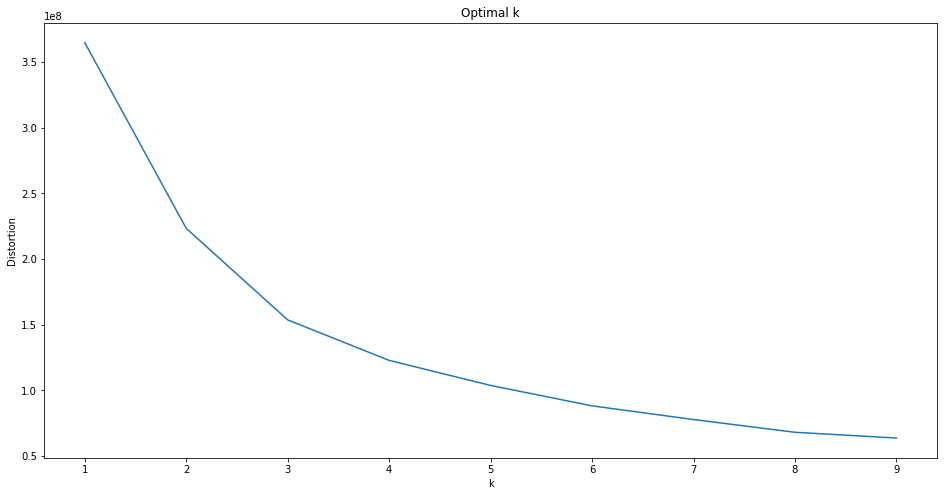

In [193]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()
#4

In [194]:
km = KMeans(n_clusters = 4)
km.fit(dfw)
cluster = km.labels_

In [195]:
newdf=dfw.assign(Cluster=cluster)
grouped=newdf.groupby(["Cluster"])
grouped.agg({'acousticness' : 'mean','danceability' : 'mean','energy' : 'mean','instrumentalness' : 'mean','loudness' : 'mean',
             'speechiness' : 'mean','tempo' : 'mean','valence' : 'mean',})

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
Cluster,,,,,,,,
0,0.263078,0.530109,0.642359,0.088944,-8.588589,0.084234,152.134117,0.539423
1,0.817384,0.476423,0.275121,0.283210,-15.177378,0.131373,88.774657,0.461234
2,0.336933,0.586966,0.571687,0.106972,-9.890721,0.075882,100.784150,0.532457
3,0.702798,0.527264,0.381461,0.228249,-13.255754,0.116513,137.858618,0.586357


In [196]:
newdf_melt=pd.melt(newdf.reset_index(), id_vars =['Cluster'],value_vars=['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence'],var_name='Metric',value_name='Value')

In [197]:
#sorts clustered DataFrame by year
result = newdf.sort_values(by='year')
result

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
70534,1921,0.9960,0.655,0.1190,0.474000,11,0.1430,-22.774,1,0,0.1270,106.511,0.558,1
61289,1921,0.9950,0.561,0.3670,0.000000,9,0.3400,-15.549,1,0,0.3540,75.554,0.759,1
103000,1921,0.9850,0.314,0.2810,0.000064,0,0.1340,-13.337,0,0,0.0648,78.811,0.354,1
135322,1921,0.9940,0.263,0.0536,0.927000,8,0.0980,-28.147,1,1,0.0386,129.365,0.186,3
135323,1921,0.9940,0.248,0.0876,0.907000,5,0.1650,-25.786,1,0,0.0566,82.025,0.077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94693,2020,0.0582,0.719,0.6110,0.000000,7,0.1550,-5.010,0,73,0.0403,129.962,0.489,0
11888,2020,0.1980,0.770,0.6360,0.000003,10,0.1150,-7.636,0,73,0.0901,93.032,0.414,2
73164,2020,0.2280,0.749,0.8150,0.001170,5,0.0838,-6.381,0,0,0.0830,102.218,0.866,2
73162,2020,0.1570,0.718,0.7110,0.000055,8,0.1000,-5.746,0,0,0.1100,173.916,0.920,0


In [198]:
c0 = newdf[newdf['Cluster']==0].reindex()
c1 = newdf[newdf['Cluster']==1].reindex()
c2 = newdf[newdf['Cluster']==2].reindex()
c3 = newdf[newdf['Cluster']==3].reindex()

In [202]:
c1

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster
21,1969,0.39300,0.196,0.644,0.000363,2,0.6430,-10.684,1,24,0.0514,74.899,0.322,1
22,1969,0.59600,0.502,0.446,0.000352,5,0.2210,-14.157,0,22,0.0557,79.037,0.756,1
23,1969,0.76400,0.460,0.435,0.005210,2,0.1170,-11.739,1,19,0.0331,74.772,0.478,1
28,1932,0.96100,0.570,0.523,0.005680,8,0.0543,-5.531,1,1,0.0720,76.272,0.783,1
30,1941,0.80900,0.645,0.447,0.001190,0,0.0827,-8.152,1,19,0.0427,76.258,0.838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170517,1956,0.87700,0.611,0.409,0.044300,8,0.2410,-7.567,1,10,0.0358,96.120,0.679,1
170518,1956,0.82100,0.559,0.421,0.000836,0,0.2020,-6.218,0,9,0.0413,99.095,0.826,1
170542,1949,0.54600,0.392,0.530,0.000000,5,0.3800,-11.463,0,0,0.0552,101.718,0.798,1
170543,1949,0.98200,0.628,0.452,0.017400,2,0.3770,-10.418,1,0,0.0434,102.445,0.717,1


In [206]:
#add artists and song name back into clusters
#c#a = cluster1 w/ artist
#c#f = cluster1 full data
c0a = c0.assign(artists=da['artists'])
c0f = c0a.assign(name=df['name'])

c1a = c1.assign(artists=da['artists'])
c1f = c1a.assign(name=df['name'])

c2a = c2.assign(artists=da['artists'])
c2f = c2a.assign(name=df['name'])

c3a = c3.assign(artists=da['artists'])
c3f = c3a.assign(name=df['name'])

In [220]:
#look at rebuilt DataFrame
c0f.sort_values('year').tail()

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster,artists,name
85223,2020,0.17000,0.654,0.452,0.0,7,0.1140,-6.360,1,78,0.0439,138.034,0.532,0,Juice WRLD,Bad Energy
36019,2020,0.00261,0.664,0.561,0.0,6,0.0764,-7.031,1,77,0.0495,150.093,0.713,0,Demi Lovato,I Love Me
85225,2020,0.16800,0.567,0.545,0.0,1,0.1120,-6.668,0,77,0.0448,174.146,0.234,0,Juice WRLD,Titanic
161587,2020,0.12100,0.657,0.880,0.0,10,0.4630,-3.672,0,86,0.1020,150.084,0.769,0,TWICE,I CAN'T STOP ME
22616,2020,0.01700,0.589,0.696,0.0,11,0.0808,-7.981,1,75,0.0725,134.953,0.332,0,BTS,Inner Child


In [222]:
song = c0f.loc[161587]
s = song.name
song

year                           2020
acousticness                  0.121
danceability                  0.657
energy                         0.88
instrumentalness                  0
key                              10
liveness                      0.463
loudness                     -3.672
mode                              0
popularity                       86
speechiness                   0.102
tempo                       150.084
valence                       0.769
Cluster                           0
artists                       TWICE
name                I CAN'T STOP ME
Name: 161587, dtype: object

In [223]:
ssong = df.iloc[s]
ssong

name                I CAN'T STOP ME
artists                       TWICE
year                           2020
acousticness                  0.121
danceability                  0.657
energy                         0.88
instrumentalness                  0
key                              10
liveness                      0.463
loudness                     -3.672
mode                              0
popularity                       86
speechiness                   0.102
tempo                       150.084
valence                       0.769
Name: 161587, dtype: object

In [225]:
c0f[(song.year >= (c0f['year'] - 5)) & (song.year <= c0f['year'] + 5)].sample(10)

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Cluster,artists,name
30515,2020,0.81700,0.542,0.299,0.000000,0,0.1090,-10.379,1,74,0.0305,141.917,0.274,0,Conan Gray,The Story
51670,2018,0.02440,0.846,0.851,0.000000,9,0.1530,-3.821,1,64,0.3720,139.966,0.822,0,"Forrest.', 'Biskwiq",Your Soul
169534,2018,0.28000,0.691,0.566,0.000000,4,0.1060,-5.213,0,62,0.2270,147.982,0.291,0,"YoungBoy Never Broke Again', 'Trippie Redd",Murda (feat. Trippie Redd)
137824,2017,0.48600,0.730,0.618,0.000000,1,0.1020,-8.185,1,57,0.3290,128.113,0.190,0,sKitz Kraven,That's All
108216,2020,0.00839,0.814,0.584,0.000000,1,0.0646,-5.425,1,67,0.0819,141.016,0.405,0,Migos,Racks 2 Skinny
84320,2016,0.66100,0.741,0.468,0.000000,7,0.1110,-6.289,1,61,0.0438,139.930,0.735,0,Joss Favela,Cuando Fuimos Nada
28374,2018,0.42700,0.518,0.404,0.000000,7,0.1170,-7.844,1,56,0.0264,154.103,0.348,0,Chris Renzema,I Don't Wanna Go
167229,2016,0.01780,0.852,0.764,0.000000,8,0.3360,-4.283,0,58,0.0631,132.981,0.266,0,"Wiz Khalifa', 'Lil Uzi Vert",Pull Up (feat. Lil Uzi Vert)
132473,2020,0.17200,0.706,0.792,0.000000,10,0.1060,-5.051,0,59,0.4630,186.023,0.585,0,Russ,Congrats Freestyle
14995,2018,0.48500,0.855,0.562,0.000008,9,0.1120,-7.099,0,72,0.2990,164.053,0.193,0,"Bhad Bhabie', 'Lil Baby",Geek'd (feat. Lil Baby)
